In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [2]:
df = pd.read_csv("file.csv")

In [3]:
# jpy/usd e hkd/usd dataset
df_hkd = pd.read_csv("HKDUSD=X.csv")
df_jpy = pd.read_csv("JPYUSD=X.csv")

In [42]:
df['HSI'] = (df['HSI']*df_hkd['Close'].mean())
df['N225'] = (df['N225']*df_jpy['Close'].mean()) 

In [44]:
df_hkd['Close'].mean()

0.12826727803379417

In [5]:
#close price
df.head()

,Date,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
0,2016-01-01,0.948024,434.33,0.005955,3.51,0.001748,562.00,1060.2,2810.900488,174.137258,2035.4,32.96,2.87
1,2016-01-02,0.937124,433.44,0.006065,3.50,0.001741,562.00,1060.2,2810.900488,174.137258,2035.4,32.96,2.87
2,2016-01-03,0.971905,430.01,0.006017,3.48,0.001744,562.00,1060.2,2810.900488,174.137258,2035.4,32.96,2.87
3,2016-01-04,0.954480,433.09,0.005958,3.50,0.001748,544.20,1075.2,2735.571521,168.805923,2009.1,32.37,2.77
4,2016-01-05,0.950176,431.96,0.006044,3.47,0.001721,535.75,1078.4,2717.819530,168.101637,2011.7,32.89,2.75


In [6]:
# no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   ETH        1827 non-null   float64
 2   BTC        1827 non-null   float64
 3   XRP        1827 non-null   float64
 4   LTC        1827 non-null   float64
 5   XLM        1827 non-null   float64
 6   Palladium  1827 non-null   float64
 7   Gold       1827 non-null   float64
 8   HSI        1827 non-null   float64
 9   N225       1827 non-null   float64
 10  SP500      1827 non-null   float64
 11  NVIDIA     1827 non-null   float64
 12  AMD        1827 non-null   float64
dtypes: float64(12), object(1)
memory usage: 185.7+ KB


In [7]:
df.shape

(1827, 13)

In [8]:
df.describe()

,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,241.212440,6131.373196,0.288848,57.071834,0.097929,1239.691653,1391.137110,3318.197669,189.920928,2680.780460,200.687849,26.026719
std,231.644267,4732.385630,0.327973,53.838674,0.117155,573.601789,218.590348,395.589216,22.991069,424.863272,127.314333,22.978505
min,0.937124,364.330000,0.005112,3.000000,0.001444,469.800000,1060.200000,2349.802671,136.794327,1824.500000,25.220000,1.800000
25%,46.590000,1187.840000,0.025938,7.360000,0.002868,788.400000,1251.700000,3046.919920,176.410283,2359.600000,107.930000,10.920000
50%,194.870000,6416.310000,0.246065,48.210000,0.067262,1015.200000,1302.900000,3351.614956,194.650973,2711.100000,179.740000,16.270000
75%,324.655000,9218.810000,0.335255,73.490000,0.122353,1619.100000,1487.800000,3615.580747,206.710206,2941.300000,247.955000,32.720000
max,1396.420000,29001.720000,3.380000,358.340000,0.896227,2711.700000,2069.400000,4252.588868,252.217874,3712.800000,582.480000,97.120000


Descrizione del dataset

In [9]:
counts = []
for col in df.columns:
    na_count = df[df[col].isna()].shape[0]
    counts.append(na_count)

pd.DataFrame(counts, index=df.columns, columns=['NA'])

,NA
Date,0
ETH,0
BTC,0
XRP,0
LTC,0
XLM,0
Palladium,0
Gold,0
HSI,0
N225,0


Check per vedere se sono presenti dati mancanti


# Prepocessing : trasformazione del tipo di dati


In [10]:
df.dtypes

Date          object
ETH          float64
BTC          float64
XRP          float64
LTC          float64
XLM          float64
Palladium    float64
Gold         float64
HSI          float64
N225         float64
SP500        float64
NVIDIA       float64
AMD          float64
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'],format = "%Y-%m-%d")

In [12]:
#df.dtypes

## Grafici preliminari


<AxesSubplot:>

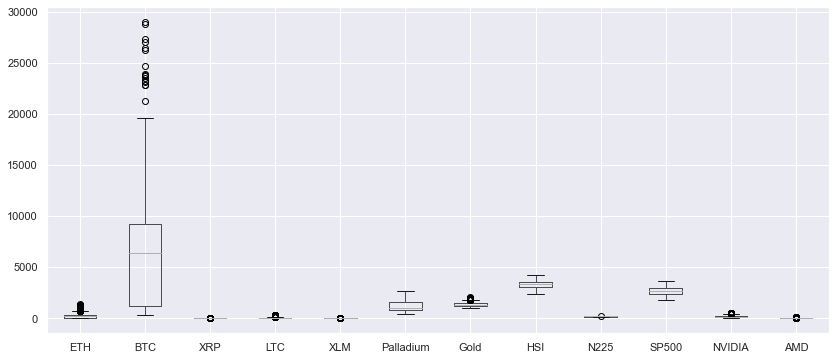

In [41]:
df.boxplot(figsize=(16,6))

In [14]:
#ax = df.groupby(['date', 'name'])['close'].mean().unstack().plot();
#ax.set_ylabel("Price per 1 unit (in USD)");
#plt.title("Price per unit of currency");

In [15]:
#copia del dataset
newdf = df.copy()

In [16]:
#uso le date come index
newdf.set_index('Date', inplace=True)

In [17]:
df_cryptocurrencies = newdf[['ETH','BTC','XRP','LTC','XLM']]
df_commodities = newdf[['Palladium','BTC','Gold']]
df_financial_indexes = newdf[['HSI','BTC','N225','SP500']]
df_stock_data = newdf[['NVIDIA','BTC','AMD']]

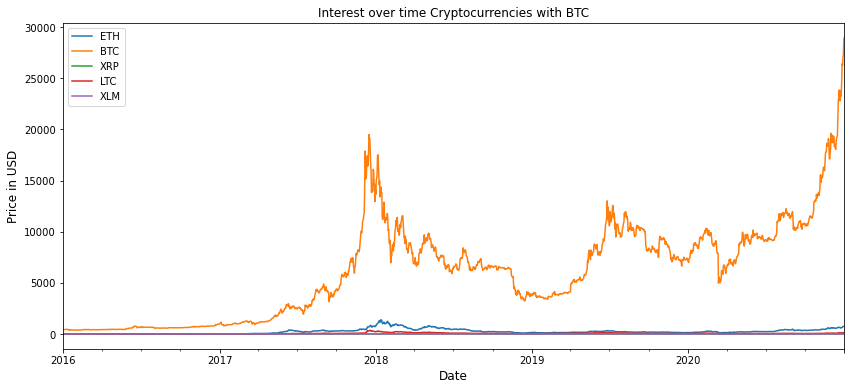

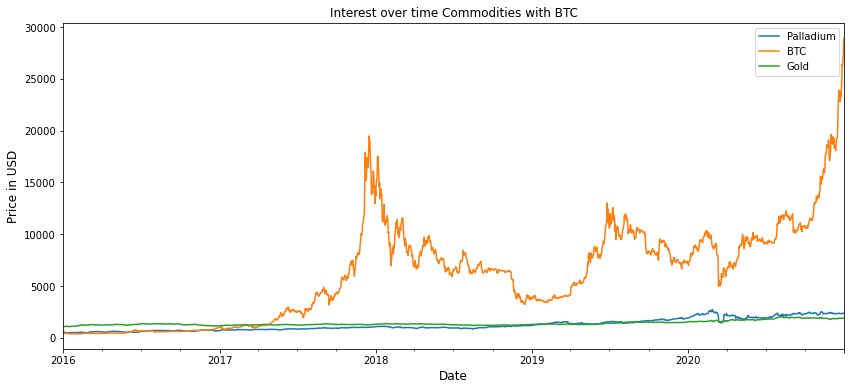

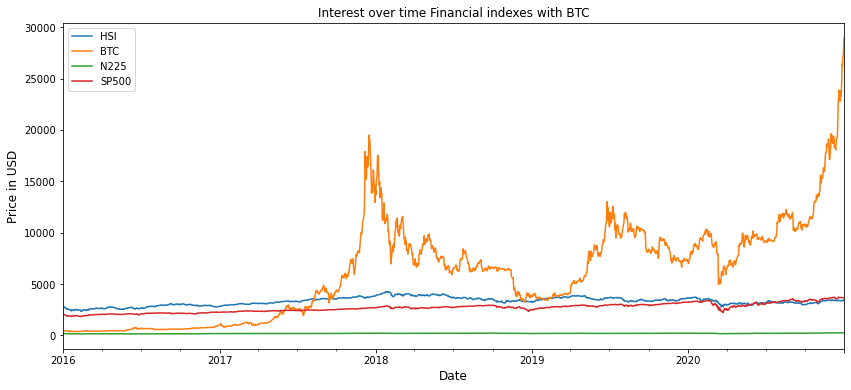

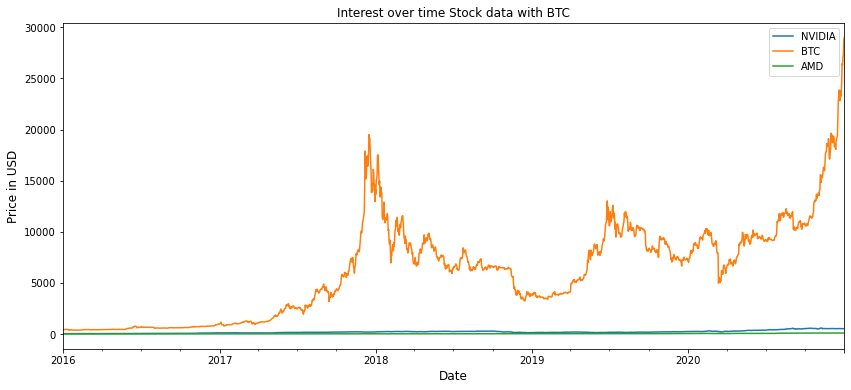

In [18]:
list1 = [df_cryptocurrencies,df_commodities,df_financial_indexes,df_stock_data]
list_name = ['Cryptocurrencies', 'Commodities', 'Financial indexes', 'Stock data']
for i in range(len(list1)):
    
    list1[i].plot(figsize=(14,6))
#df_commodities.plot(figsize=(14,6))
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    plt.title('Interest over time '+ list_name[i] + ' with BTC');

## Correlazione di Pearson e Kendall

Text(0.5, 1.0, 'pearson correlation map')

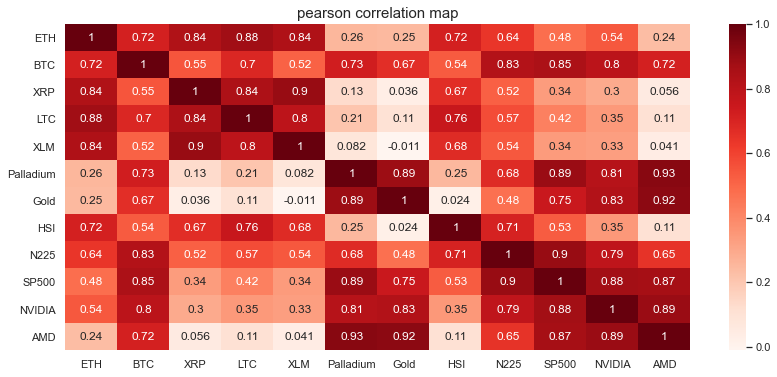

In [19]:
import seaborn as sns
#pearson correlation
data_corr = newdf.iloc[:, :].corr(method = "pearson")
sns.set(rc={"figure.figsize":(14, 6)})
sns.heatmap(data_corr, annot=True, cmap='Reds')
plt.title("pearson correlation map", fontsize=15)



Text(0.5, 1.0, 'kendall correlation map')

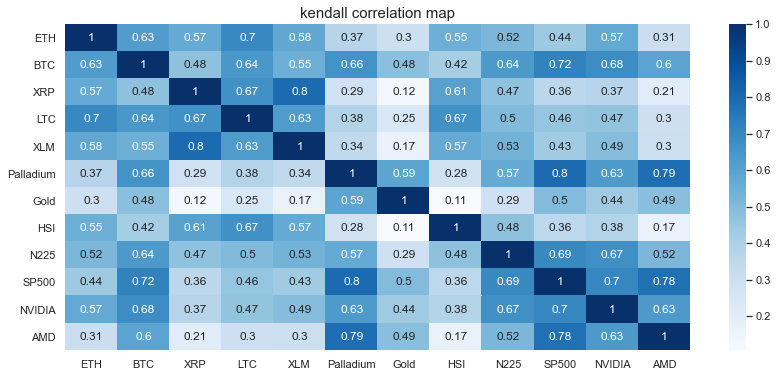

In [20]:
#kendall correlation
data_corr2 = newdf.iloc[:, :].corr(method = 'kendall')
sns.heatmap(data_corr2, annot=True, cmap="Blues")
plt.title("kendall correlation map", fontsize=15)

In [21]:
#sns.pairplot(newdf)

## Grafici: prendo in considerazione solo il 2020

In [22]:
df_2020 = df[df.Date.dt.year >= 2020]

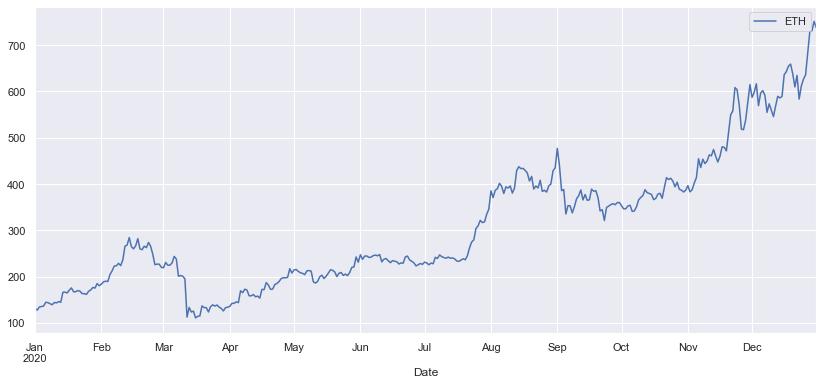

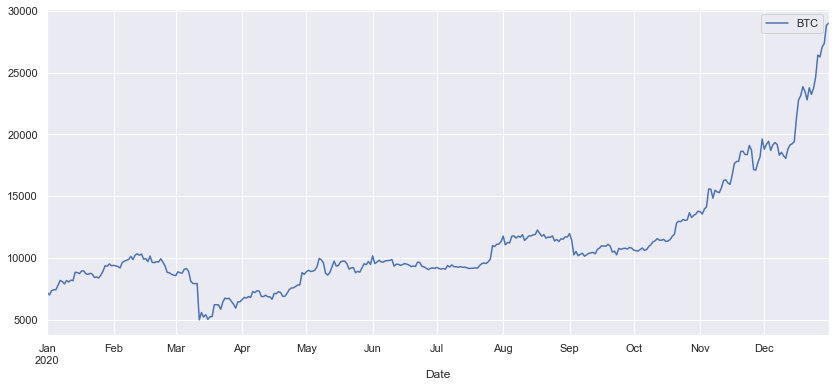

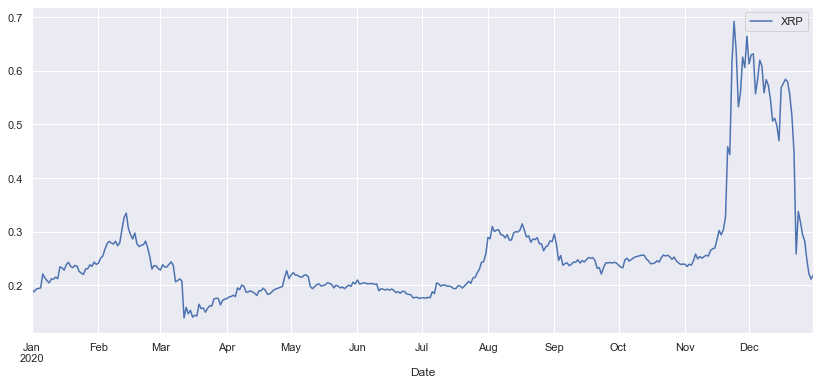

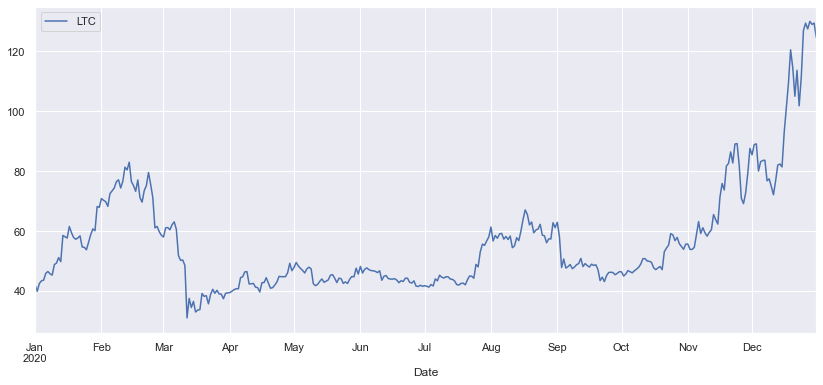

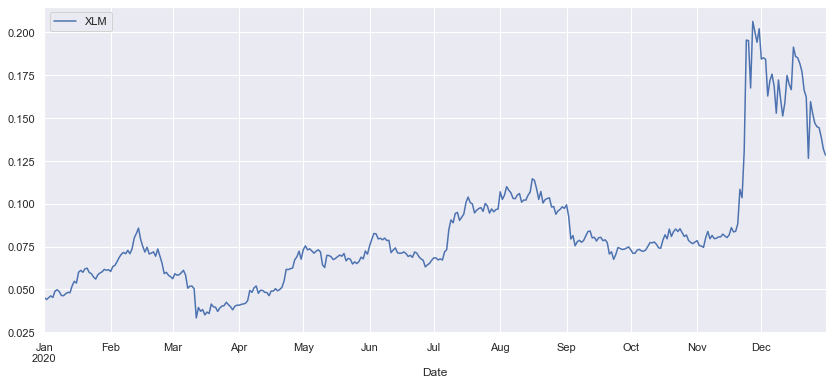

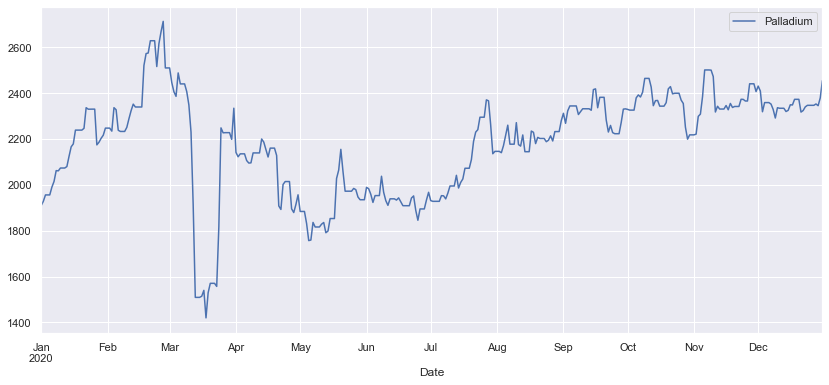

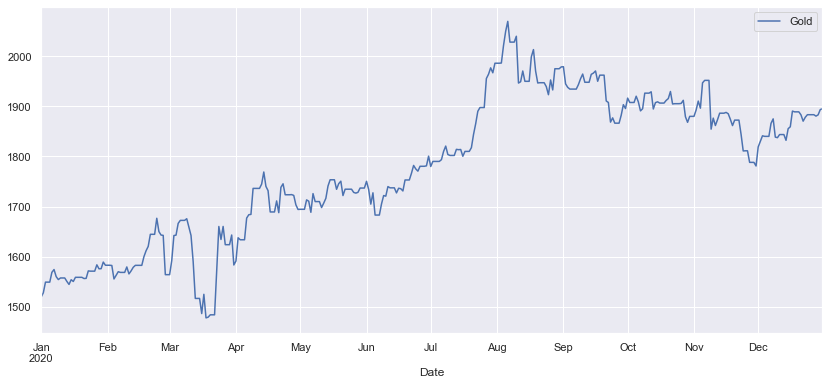

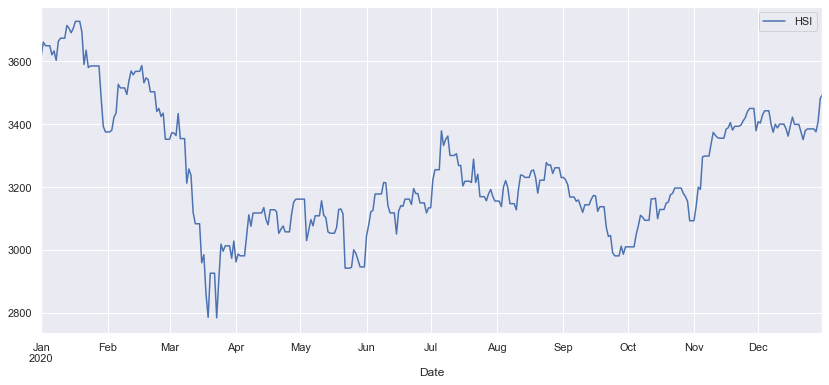

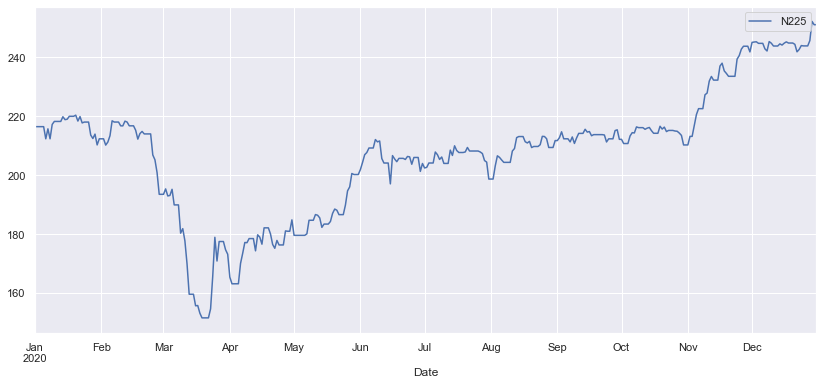

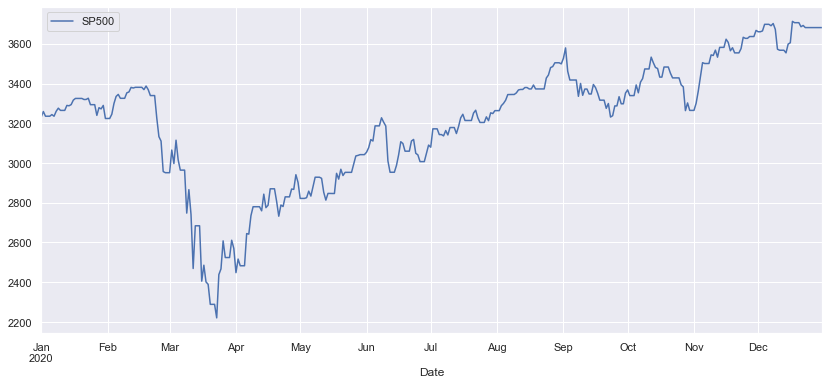

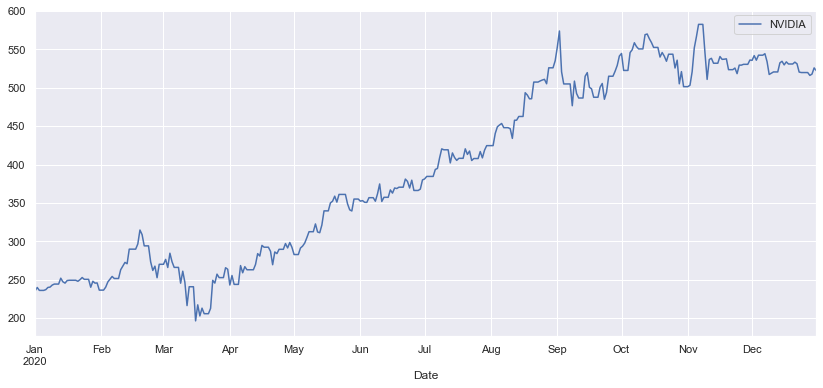

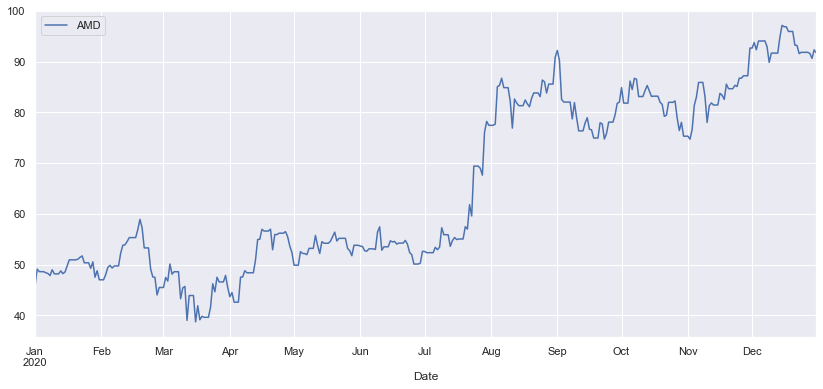

In [23]:
#take exam 2020 year
list2 = list(df_2020.columns[1:])
for i in list2:
    df_2020.plot(x='Date', y=i)

Un trend simile è riportato durante il primo anno di pandemia globale da parte di tutti gli indicatori finanziari

<AxesSubplot:xlabel='Date'>

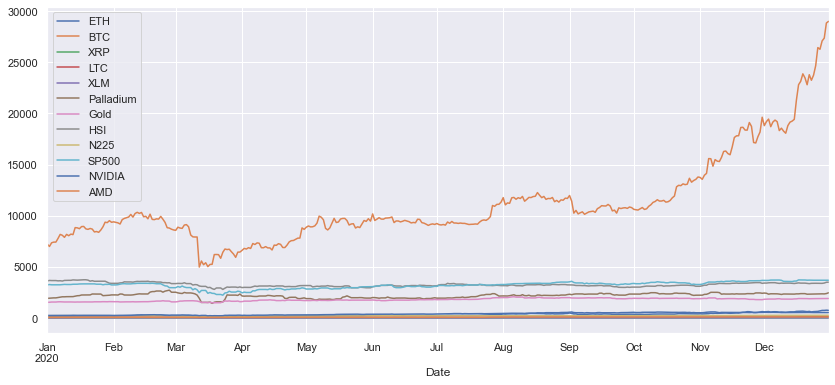

In [24]:
df_2020.plot(x='Date')

Grafico che riporta l'andamento dei vari indicatori presenti nel dataset nell' anno 2020.

## Returns

I rendimenti nel mercato delle monete non sono altro che una variazione percentuale del prezzo.

In [25]:
#faccio una copia del dataset
df_return = newdf.copy()

In [26]:
#funzione che mi calcola (P1-P0)/P0 il ritorno rispetto al numero di righe specificate nel parametro periods
df_return = df_return.pct_change()

In [27]:
df_return = df_return.drop(df_return.index[0])


In [28]:
df_return

,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
Date,,,,,,,,,,,,
2016-01-02,-0.011498,-0.002049,0.018472,-0.002849,-0.004005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-03,0.037115,-0.007913,-0.007914,-0.005714,0.001723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-04,-0.017929,0.007163,-0.009806,0.005747,0.002294,-0.031673,0.014148,-0.026799,-0.030616,-0.012921,-0.017900,-0.034843
2016-01-05,-0.004509,-0.002609,0.014434,-0.008571,-0.015446,-0.015527,0.002976,-0.006489,-0.004172,0.001294,0.016064,-0.007220
2016-01-06,0.000720,-0.006598,-0.006784,-0.005764,-0.028472,-0.057303,0.012519,-0.009812,-0.009942,-0.012825,-0.041350,-0.089091
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.073603,-0.006232,-0.039611,-0.014985,-0.014104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-28,0.069964,0.030927,-0.123944,0.019840,-0.004125,0.002515,-0.001487,-0.002726,0.007406,0.000000,-0.007215,-0.002287
2020-12-29,0.001533,0.010250,-0.108873,-0.007766,-0.038511,-0.003189,0.001330,0.009647,0.026593,0.000000,0.003353,-0.010699


## Grafico dei rendimenti

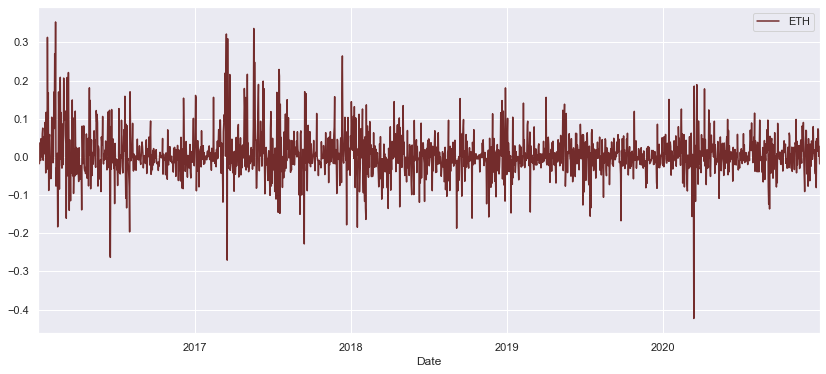

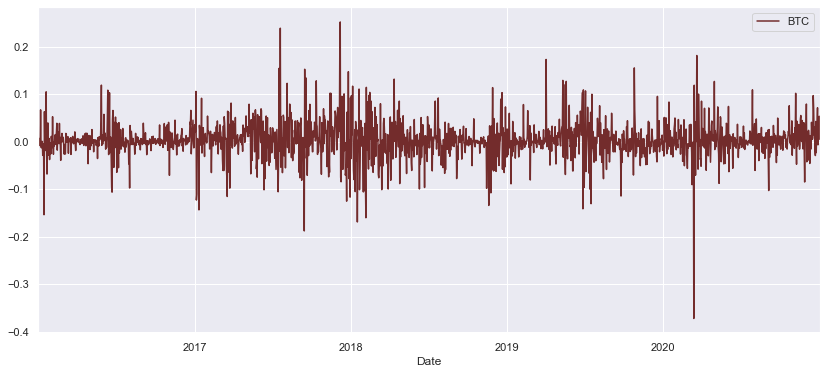

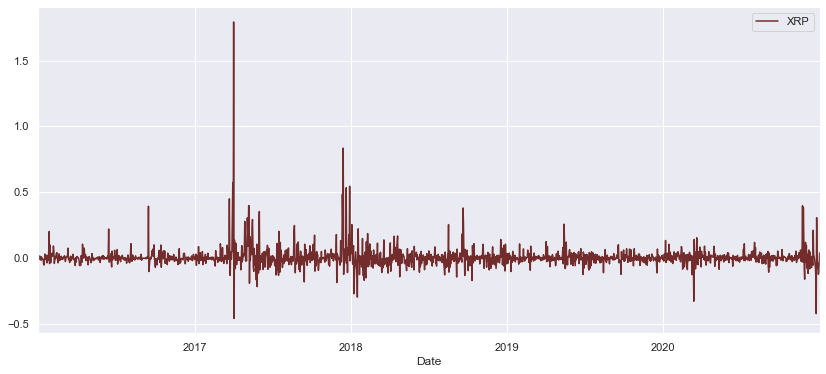

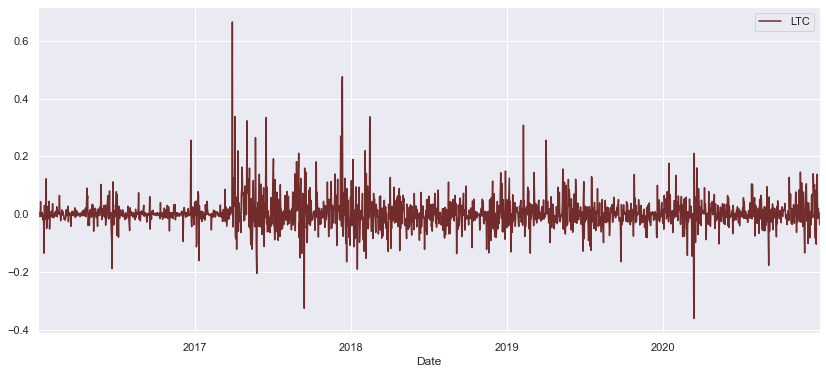

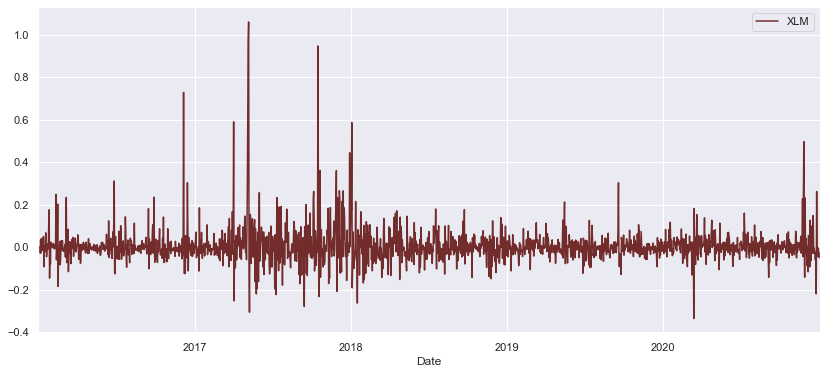

In [29]:
list_return = ['ETH','BTC','XRP','LTC','XLM']
for i in list_return:
    
    df_return.plot( y= i , color='#732C2C')

In [30]:
#df_return.iloc[:, :].corr()
#valori bassi nella correlazione tra return

In [31]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df_return)

,Feature,Number of Outliers
0,ETH,157
1,BTC,211
2,XRP,213
3,LTC,183
4,XLM,169
5,Palladium,246
6,Gold,315
7,HSI,307
8,N225,317
9,SP500,389


Numero di outliers presenti in ciascuna feature

#### Boxplot considerando anche gli outliers

<AxesSubplot:>

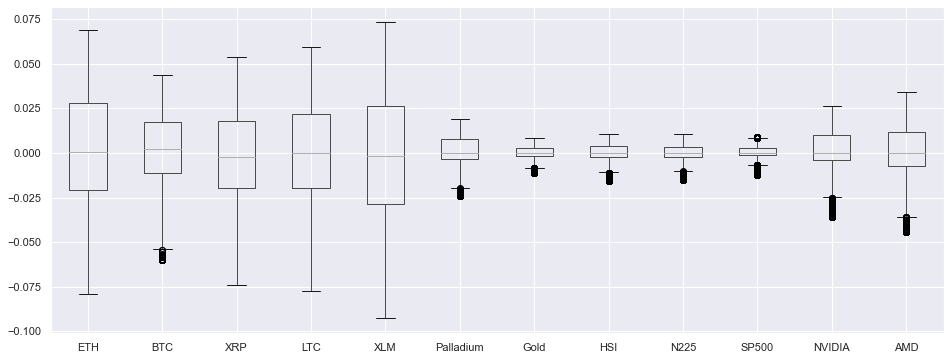

In [37]:
df_return.boxplot(figsize=(16,6))

In [33]:
#from pandas.plotting import lag_plot
#lag_plot(df_return['BTC'].tail(250))

Eliminazione degli outliers

In [34]:
#Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df_return2 = df_return.copy()
df_return2 = treat_outliers(df_return2)

In [35]:
detect_outliers(df_return2)

,Feature,Number of Outliers
0,ETH,0
1,BTC,110
2,XRP,0
3,LTC,0
4,XLM,0
5,Palladium,136
6,Gold,156
7,HSI,168
8,N225,161
9,SP500,389


#### Boxplot senza considerare gli outliers

<AxesSubplot:>

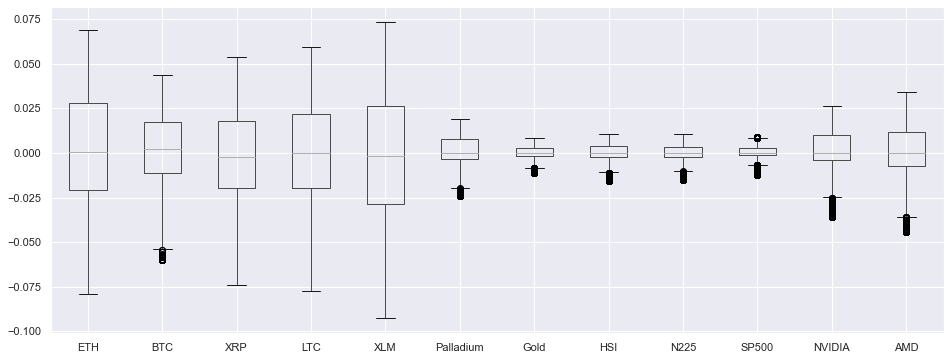

In [36]:
df_return2.boxplot(figsize=(16,6))